<a href="https://colab.research.google.com/github/rb58853/ML-RSI-Images/blob/main/code/CLIP-Embedding/CLIPEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rb58853/ML-RSI-Images.git
!python3 -m pip install opencv-python matplotlib
!python3 -m pip install 'git+https://github.com/rb58853/segment-anything.git'

Cloning into 'ML-RSI-Images'...
remote: Enumerating objects: 752, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 752 (delta 35), reused 76 (delta 28), pack-reused 660
Receiving objects: 100% (752/752), 22.63 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (292/292), done.
  Cloning https://github.com/rb58853/segment-anything.git to /tmp/pip-req-build-669nfrwj
  Running command git clone --filter=blob:none --quiet https://github.com/rb58853/segment-anything.git /tmp/pip-req-build-669nfrwj
  Resolved https://github.com/rb58853/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=b82b3658101b71db40d4e0d0c56f4b0d5353437217327194d0d22f36e90b6e0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-7uzrejt9/wheels/5b/3b/a9/8a4ffebff15c8288d2f9fb53f57947811c48cc909ee30

In [2]:
import os
os.chdir('ML-RSI-Images/code/CLIP-Embedding')
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-12-22 21:49:52--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.51, 3.163.189.108, 3.163.189.14, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   255MB/s    in 11s     

2023-12-22 21:50:02 (230 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [3]:
from clip_embeding import ClipEmbedding
clip = ClipEmbedding()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
from PIL import Image
image_path = '../../images/'
image = Image.open(image_path+'image_4.jpg')


In [5]:
# text = 'two dogs in a white and black couch'
texts = ['two dogs siting in a white and black couch', 'a bird eating fruit', 'a dog sleeping']
texts = [f'a photo of {text}' for text in texts]

In [6]:
image_embedding = clip.get_image_embedding(image)
text_embedding = clip.get_text_embedding(texts)
print(text_embedding)


tensor([[ 0.0264,  0.0110, -0.0916,  ...,  0.0427, -0.0338, -0.0211],
        [ 0.0139,  0.0117, -0.0030,  ..., -0.0413, -0.0003, -0.0536],
        [ 0.0121,  0.0429, -0.0669,  ..., -0.0548, -0.0387,  0.0026]],
       device='cuda:0', grad_fn=<DivBackward0>)


In [7]:
for text in text_embedding:
    print(clip.calculate_similarity(image_embedding[0], text))

0.3265710771083832
0.08138111978769302
0.21113282442092896


In [8]:
from clip_embeding import ProcessImages
process = ProcessImages()

PyTorch version: 2.1.0+cu121
Torchvision version: 0.16.0+cu121
CUDA is available: True


In [9]:
subembeddings = process.get_embedding_segmentations(image_path= image_path+'image_4.jpg')

In [10]:
process.ranking(image_path+'image_4.jpg')
# image_embedding = clip.get_image_embedding(image)
# print(clip.calculate_similarity(image_embedding[0], subembeddings[0]))

index_30: 0.9164300560951233
index_24: 0.8795366883277893
index_5: 0.8616453409194946
index_18: 0.8464283347129822
index_28: 0.765468418598175
index_6: 0.7624653577804565
index_31: 0.7362437844276428
index_12: 0.7022604942321777
index_19: 0.6751875281333923
index_9: 0.6717880368232727
index_25: 0.6687725186347961
index_11: 0.6578432321548462
index_15: 0.6477809548377991
index_20: 0.6328585147857666
index_16: 0.6289148330688477
index_10: 0.6228368878364563
index_21: 0.5910958051681519
index_2: 0.5815295577049255
index_13: 0.5762941241264343
index_0: 0.5504363179206848
index_4: 0.547540545463562
index_23: 0.5433881878852844
index_29: 0.5334946513175964
index_26: 0.5280562043190002
index_32: 0.5226906538009644
index_27: 0.5213863849639893
index_14: 0.5209510326385498
index_3: 0.5097439289093018
index_7: 0.5008950233459473
index_22: 0.4894295930862427
index_17: 0.4744645953178406
index_1: 0.4492647647857666
index_8: 0.42839229106903076


{0.9164300560951233: tensor([ 8.1225e-02,  7.6889e-02, -2.3910e-01,  5.4951e-03,  2.8078e-01,
         -4.4291e-01,  2.2962e-01,  3.5920e-01,  7.7678e-01,  7.2566e-01,
         -1.4640e-01, -2.3538e-01, -5.1822e-01, -2.5289e-01,  2.4085e-01,
          2.8586e-01, -2.5417e-01, -1.5378e-01,  1.1872e-01, -1.2101e-01,
         -2.6707e-01,  1.1591e-01,  5.4243e-01,  7.0989e-02, -2.9228e-01,
          1.9822e-02,  5.2079e-01, -8.7655e-02,  2.1948e-01, -2.2230e-01,
          1.1219e-01, -3.7275e-02,  1.6425e-02, -2.0105e-01, -5.5230e-01,
          3.1429e-01, -7.1012e-02, -3.8329e-01, -2.7735e-01,  1.5555e+00,
         -2.9249e-01,  2.2060e-01,  6.1880e-01, -3.7559e-02,  2.6995e-01,
         -3.3419e-01,  2.0449e-01,  6.5644e-02,  4.3355e-01,  2.7858e-01,
         -2.3898e-01, -1.3681e-01,  1.7765e-01,  2.3173e-01,  4.1964e-02,
          1.2115e-01,  8.2732e-03,  1.8727e-01,  2.1616e-01, -8.5380e-02,
         -7.2177e-01, -9.2704e-02,  3.3794e-01,  2.7133e-01, -1.6342e-01,
          5.5744e-

In [16]:
# similarity = (100.0 * image_embedding @ text_embedding.T).softmax(dim=-1)
similarity = (0.1 * image_embedding @ subembeddings.T).softmax(dim=-1)
values, indices = similarity[0].topk(30)
print (similarity)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{index}: {100 * value.item():.2f}%")

tensor([[0.0047, 0.0015, 0.0069, 0.0029, 0.0053, 0.1030, 0.0451, 0.0035, 0.0006,
         0.0142, 0.0201, 0.0226, 0.0241, 0.0065, 0.0024, 0.0152, 0.0073, 0.0021,
         0.1522, 0.0284, 0.0145, 0.0138, 0.0028, 0.0053, 0.1888, 0.0314, 0.0030,
         0.0029, 0.0531, 0.0036, 0.1580, 0.0499, 0.0044]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

Top predictions:

24: 18.88%
30: 15.80%
18: 15.22%
5: 10.30%
28: 5.31%
31: 4.99%
6: 4.51%
25: 3.14%
19: 2.84%
12: 2.41%
11: 2.26%
10: 2.01%
15: 1.52%
20: 1.45%
9: 1.42%
21: 1.38%
16: 0.73%
2: 0.69%
13: 0.65%
4: 0.53%
23: 0.53%
0: 0.47%
32: 0.44%
29: 0.36%
7: 0.35%
26: 0.30%
27: 0.29%
3: 0.29%
22: 0.28%
14: 0.24%


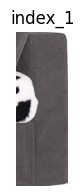

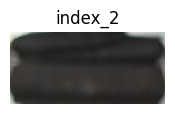

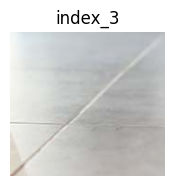

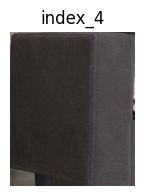

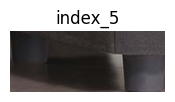

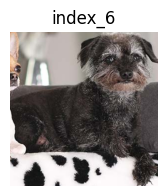

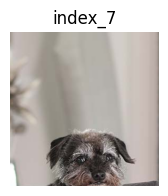

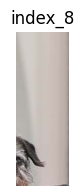

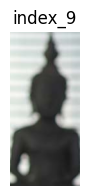

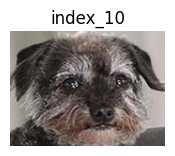

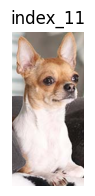

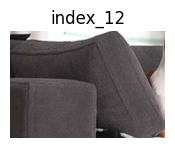

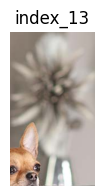

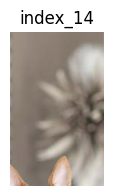

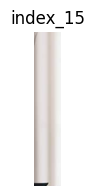

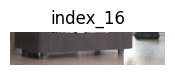

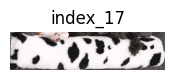

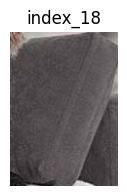

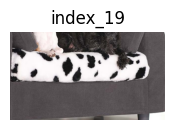

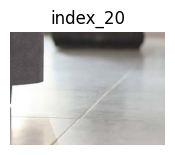

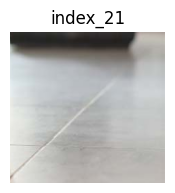

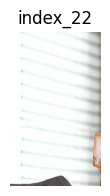

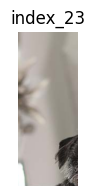

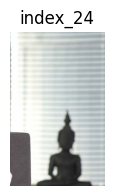

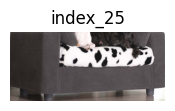

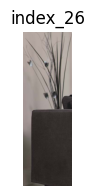

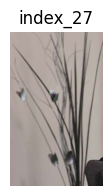

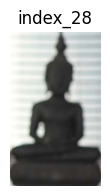

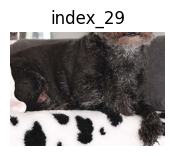

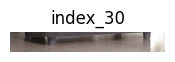

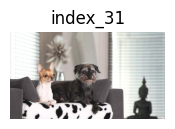

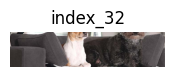

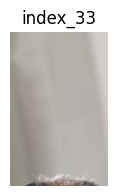

In [17]:
process.show_images()